# Opacities

This notebook shows how to create/read our **current** set of opacities. 

**Part 1** creates the opacities (this part will be updated), and **part 2** reads the created opacities (this part should stay the same). Both parts have their own `import` statements so that people without the tools to create the opacities could still use part 2 for reading in the resulting opacity files.

We now create the opacities in a transparent (open-source) way. In the near future, the opacities will be averaged over a narrow size distribution within each bin, to avoid resonance issues.

--------------------------------
## Part 1: Creating the opacities

### Procedure

The opacity is created in the following way, following [Ricci et al. 2010](https://dx.doi.org/10.1051/0004-6361/200913403):

| Optical constants                                                                | Volume fractions [%] | material density [g/cm^3] |
|:---------------------------------------------------------------------------------|---------------------:|--------------------------:|
| Astronomical Silicates: [Draine 2003](https://dx.doi.org/10.1086/379123)         |           7          |            3.50           |
| Carbon  grains: [Zubko et al. 1996](https://dx.doi.org/10.1093/mnras/282.4.1321) |          21          |            2.50           |
| Water ice: [Warren & Brandt 2008](https://dx.doi.org/10.1029/2007JD009744)       |          42          |            1.00           |
| Vacuum                                                                           |          30          |            0.00           |

The mixing of the optical constants is done according to the Bruggeman mixing rule and the opacities are calculated using a Bohren & Huffman Mie code, more specifically a Fortran 90 translation of [Bruce Draines `bhmie.f`](https://www.astro.princeton.edu/~draine/scattering.html) code.

### The Code

To install the Large Program Opacity package `lp_opac` you can download code from [github](https://github.com/birnstiel/lp_opac), change into that directory, and install the package with the command

    pip install .

In [1]:
import numpy as np
import lp_opac

In [2]:
a = np.logspace(-5, 2, 200)
lam = np.logspace(np.log10(6.5e-6), 0, 206)

k_abs, k_sca, g, S1, S2, rho_s = lp_opac.get_opacities(a, lam, return_all=True, extrapol=True)

Note: wavelength range outside data. Extrapolation will be done but is uncertain.
Mie ... Done!


Store the data

In [3]:
np.savez_compressed('default_opacities', a=a, lam=lam, k_abs=k_abs.T, k_sca=k_sca.T, g=g)

--------------------------------
## Part 2: Reading in from default format

As we update part 1, the opacities might change slightly, but this part should stay the same.

Imports for this part:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['seaborn',{'figure.dpi':150}])

Loading the data

In [2]:
data = np.load('default_opacities.npz')

a = data['a']
lam = data['lam']
k_abs = data['k_abs']
k_sca = data['k_sca']
g = data['g']

As an example: plot the opacities of the smallest grains as function of wavelength:

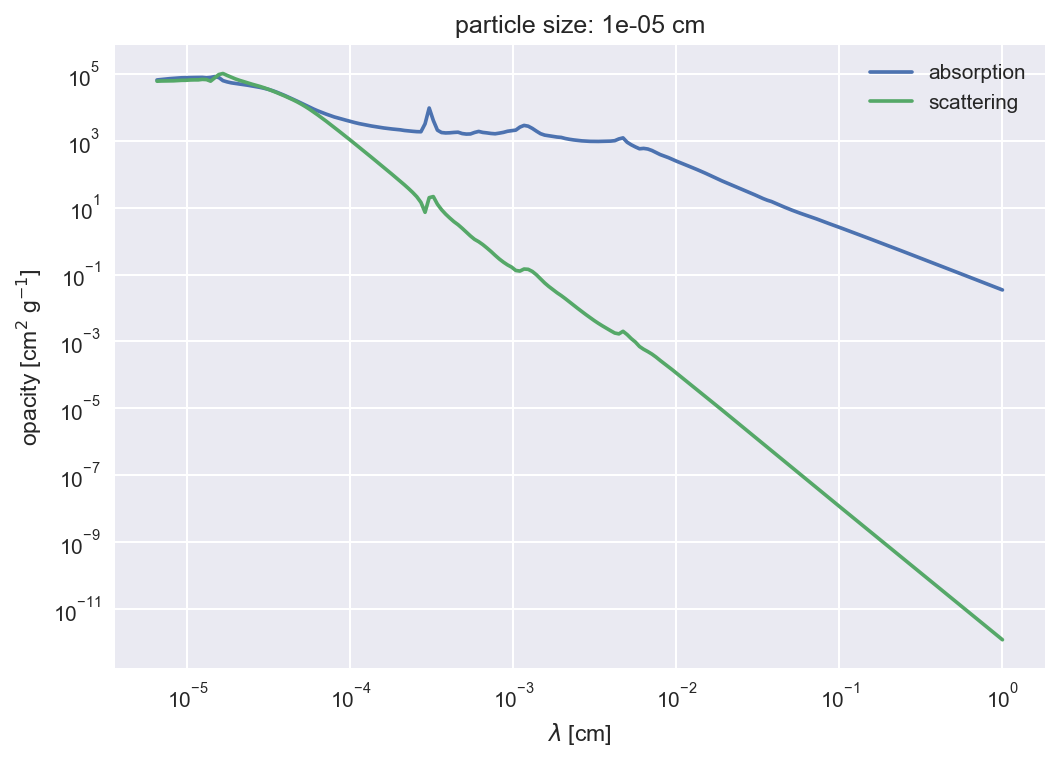

In [3]:
f, ax = plt.subplots()
ax.loglog(lam, k_abs[:, 0], label='absorption')
ax.loglog(lam, k_sca[:, 0], label='scattering')
ax.set_title(f'particle size: {a[0]} cm')
ax.set_ylabel('opacity [cm$^2$ g$^{-1}$]')
ax.set_xlabel('$\lambda$ [cm]')
ax.legend();